## Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard

### **Question 1**: Use yfinance to Extract Stock Data

In [1]:
!pip install yfinance
!pip install matplotlib
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly
# !pip install pandas==1.3.3!pip install pandas

In [2]:
import yfinance as yf
import pandas as pd

### Download historical data

In [3]:
tesla_data = yf.Ticker("TSLA")

In [4]:
tesla_data = tesla_data.history(period="max")

### Display the downloaded data

In [5]:
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### **Question 2**: Use Webscraping to Extract Tesla Revenue Data

In [6]:
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [8]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [9]:
html_data = requests.get(url).text

In [10]:
from bs4 import BeautifulSoup

In [11]:
soup = BeautifulSoup(html_data, 'html.parser')

In [12]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [13]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    if len(col) >= 2:
        Date = col[0].text.strip()
        Revenue = col[1].text.strip()
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})],ignore_index=True)

In [14]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [15]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [16]:
tesla_revenue.tail()

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


### **Question 3**: Use yfinance to Extract Stock Data

In [17]:
!pip install yfinance
!pip install matplotlib
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly
# !pip install pandas==1.3.3

In [18]:
import yfinance as yf
import pandas as pd

In [19]:
gme_data = yf.Ticker("GME")

In [20]:
gme_data = gme_data.history(period="max")

In [21]:
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### **Question 4**: Use Webscraping to Extract GME Revenue Data

In [22]:
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

In [23]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [24]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [25]:
html_data_2 = requests.get(url).text

In [26]:
from bs4 import BeautifulSoup

In [27]:
soup = BeautifulSoup(html_data, 'html.parser')

In [28]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [29]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    if len(col) >= 2:
        Date = col[0].text.strip()
        Revenue = col[1].text.strip()
        gme_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})],ignore_index=True)

In [30]:
gme_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [31]:
gme_revenue.dropna(inplace=True)
gme_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [32]:
gme_revenue.tail(5)

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


### **Question 5**: Plot Tesla Stock Graph

In [33]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install plotly

In [59]:
tesla_data.reset_index(inplace=True)

In [60]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

/tmp/ipykernel_3458/3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_3458/3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



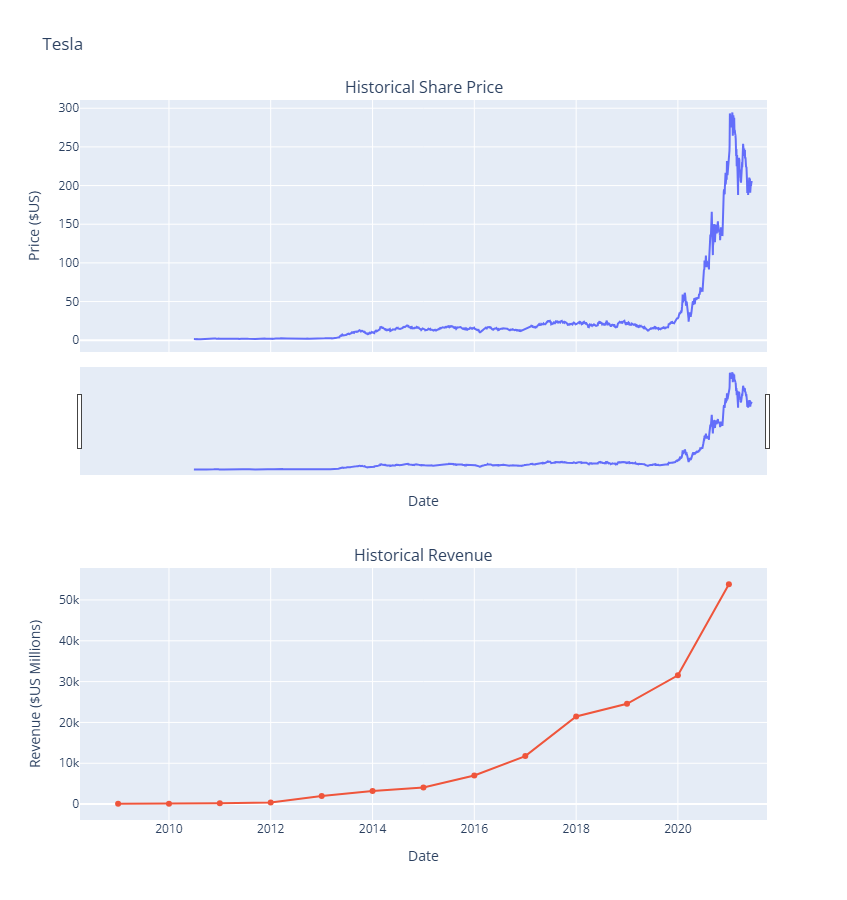

In [62]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

### **Question 5**: Plot GameStop  Stock Graph

In [69]:
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [70]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

/tmp/ipykernel_3458/3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_3458/3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



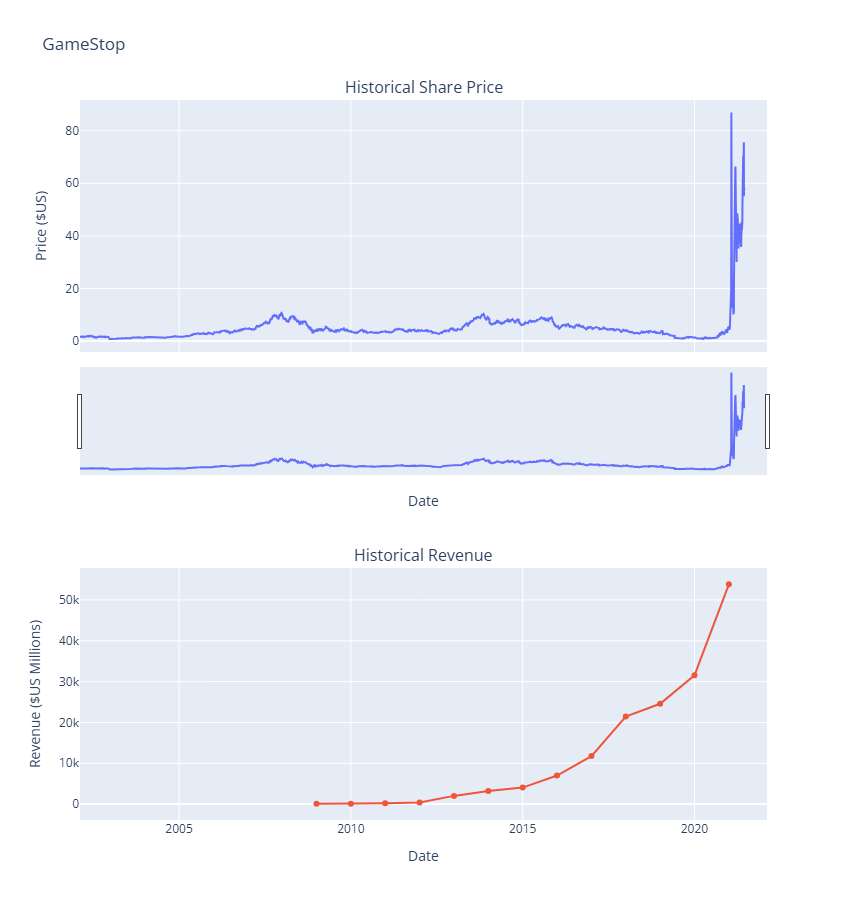

In [71]:
make_graph(gme_data, gme_revenue, 'GameStop')